<a href="https://colab.research.google.com/github/rosepcaldas/GradEstatistica/blob/main/ATV3_IntroducaoR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina: Introdução A Programação Em Big Data
# Atividade 3
Análise de consumo de veículos utilizando o dataset mtcars do R

Dentro do R existem diversos datasets disponíveis para análises. Um desses datasets diz respeito a informações sobre veículos e pode ser acessado através do comando mtcars, retornando um data frame contendo informações sobre veículos, como: consumo, peso, potência, se é automático ou não, etc.

Um grupo de amigos de infância decidiu montar uma consultoria especializada em inteligência de mercado baseada em dados, voltada para o segmento de montadoras de carros. Para o início dos trabalhos, decidiram primeiramente  conhecer melhor as características de consumo dos veículos.

Caro estudante, seu papel na consultoria é desempenhar a tarefa de Cientista de dados. Em razão disso, foi atribuída a você a tarefa de gerar os gráficos de consumo dos veículos (pelo menos 3). Portanto, explique em um texto o que os gráficos dizem a respeito do consumo de veículos.

In [1]:
# Instalação dos pacotes utilizados
install.packages("ggplot2")
install.packages("ggcorrplot")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




In [2]:
# Carregar ggplot2 (necessário instalar o pacote na primeira utilização)
library(ggplot2)
library(ggcorrplot)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [5]:
# Ler o dataset mtcars
?mtcars
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] -0.8676594

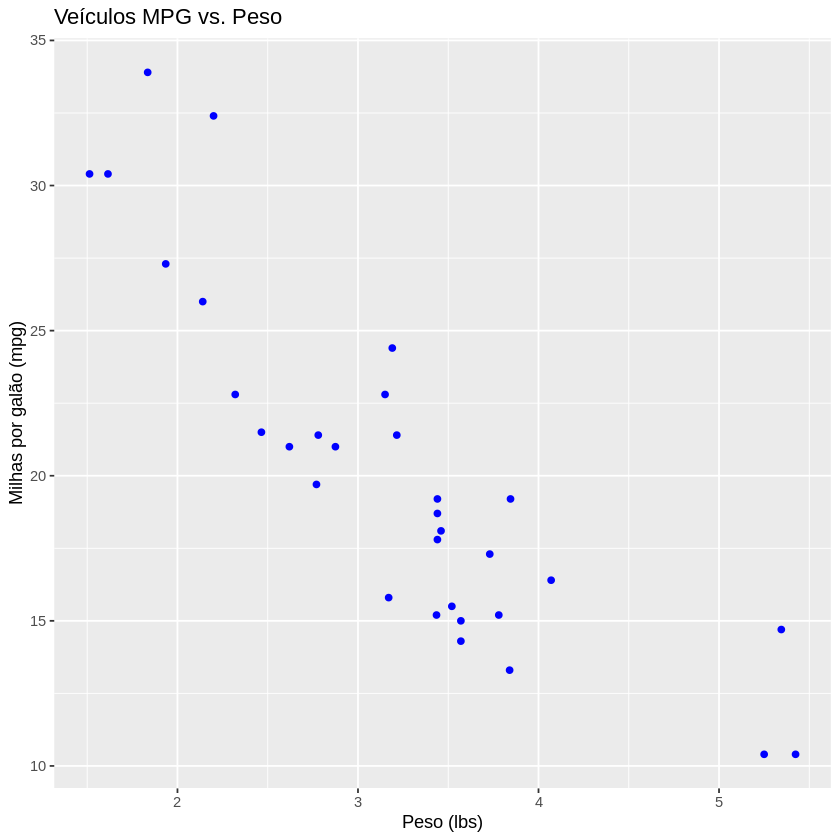

In [9]:
# Gráfico de dispersão entre duas variáveis
# y = milhas por galão (mpg)
# x = peso do carro (wt)

cor(mtcars$mpg,mtcars$wt)
ggplot(mtcars, aes(x = wt, y = mpg)) +  geom_point(color = "blue") +  labs(x = "Peso (lbs)", y = "Milhas por galão (mpg)") +  ggtitle("Veículos MPG vs. Peso")


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


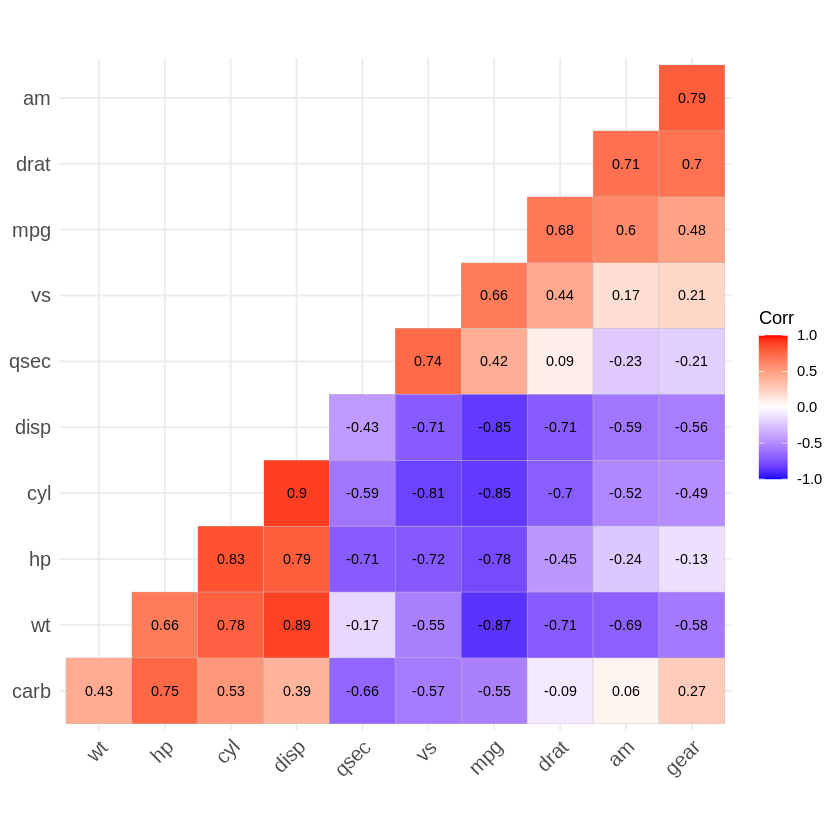

In [10]:
# correlação existente entre todas as variáveis e representá-las em forma gráfica

matrizcorrelacao = cor(mtcars)
ggcorrplot(matrizcorrelacao, hc.order = TRUE, type = "lower", lab=TRUE, lab_size = 3)
matrizcorrelacao

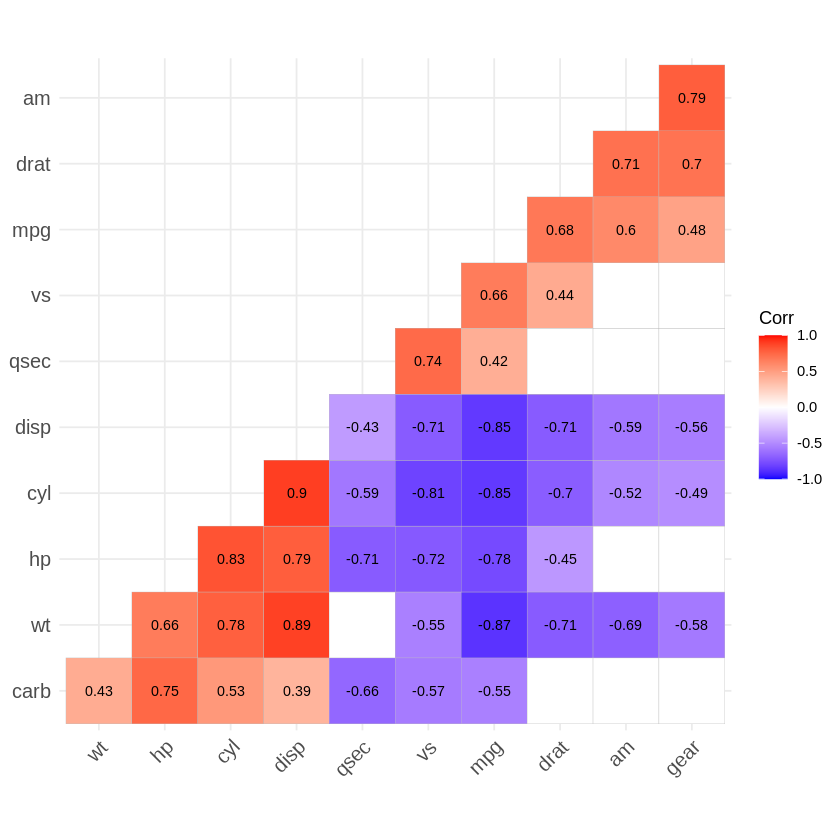

In [11]:
# Podemos utilizar um teste de significância para esconder no gráfico os valores que não são significativos

ggcorrplot(matrizcorrelacao, 
           hc.order = TRUE, 
           type = "lower", 
           lab=TRUE, 
           lab_size = 3,
           p.mat = cor_pmat(mtcars), # Matriz de p-valores para correlaçao
           insig = "blank" # Deixa em branco os valores insgnificantes (alfa = 5%)
           )

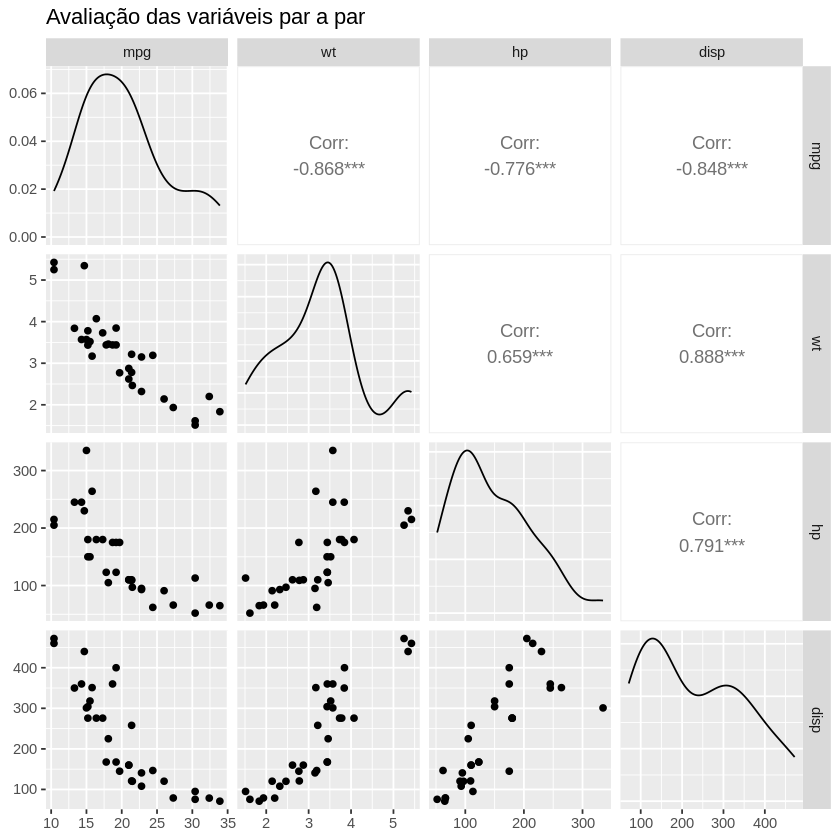

In [12]:
# Avaliação das variáveis par a par (variáveis selecionadas: mpg, wt, hp, disp)

g = ggpairs(
  data = mtcars,
  columns = c(1,6,4,3), # Seleciona colunas do dataset
  # mapping = aes(colour = variavel) # Colorir de acordo com varialvel qualitativa
  title = "Avaliação das variáveis par a par")

g